This notebook uses the access library to calculate and plot spatial access metrics for one town in Brazil. 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from access import Access, weights, Datasets
# Transforming dataset into geopandas data
import geopandas as gpd
from shapely import wkt



In [2]:
# Importing data
school_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/school_census.csv",index_col=0)
dem_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/dem_census.csv", index_col=0)

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_6292/1079503947.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dem_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/dem_census.csv", index_col=0)


In [3]:
#Turn into geopandas
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
dem_census_df["geometry"] = dem_census_df['geometry'].apply(wkt_loads)
school_census_df["geometry"] = school_census_df['geometry'].apply(wkt_loads)

geo_dem_census_df = gpd.GeoDataFrame(dem_census_df, crs = "EPSG:4674", geometry = 'geometry')
geo_school_census_df = gpd.GeoDataFrame(school_census_df, crs = "EPSG:4674", geometry = 'geometry')
#

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [4]:

# Removing NaNs
geo_dem_census_df = geo_dem_census_df[~geo_dem_census_df.geometry.is_empty]
geo_school_census_df = geo_school_census_df[~geo_school_census_df.geometry.is_empty]
geo_dem_census_df = geo_dem_census_df[~geo_dem_census_df.geometry.isna()]
geo_school_census_df = geo_school_census_df[~geo_school_census_df.geometry.isna()]

geo_school_census_df.head()

,region_name,region_id,state_name,state_abbrev,state_id,city_name,city_id,mesoregion_name,mesoregion_id,microregion_name,...,address,address_number,address_complement,neighborhood,zip_code,n_students,n_teachers,n_classes,sigla_uf,geometry
1,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,AVENIDA RIO DE JANEIRO,4776,ESCOLA,CIDADE ALTA,76954000.0,0.0,0.0,0.0,RO,POINT (-61.98651 -11.93096)
2,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,LINHA 60 COM A 140,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0,RO,POINT (-62.17758 -12.04284)
3,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,ROLIM DE MOURA DO GUAPORE,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0,RO,POINT (-62.27693 -13.08367)
7,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,LINHA P 50 KM 22,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0,RO,POINT (-61.99335 -12.12982)
8,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,AVENIDA MATO GROSSO,3861,NaN,CENTRO,76954000.0,264.0,39.0,27.0,RO,POINT (-61.99506 -11.92733)


In [5]:
# Projecting into the same geometry

# https://epsg.io/5880 
# The units are in meters which facilitates the interpretation of distance
geo_dem_census_df = geo_dem_census_df.to_crs(epsg = 5641)
geo_school_census_df = geo_school_census_df.to_crs(epsg = 5641)


/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [6]:
geo_school_census_df.isna().sum()

region_name              726
region_id                726
state_name               726
state_abbrev             726
state_id                 726
city_name                726
city_id                  726
mesoregion_name          726
mesoregion_id            726
microregion_name         726
microregion_id           726
sector_id                726
school_id                  0
school_name              726
admin_type               726
location_type            726
address                 1815
address_number         26569
address_complement    100099
neighborhood           16180
zip_code                1814
n_students             10479
n_teachers             10856
n_classes              10479
sigla_uf                   0
geometry                   0
dtype: int64

In [7]:
geo_dem_census_df.columns

Index(['sector_id', 'state', 'n_households', 'n_people',
       'avg_monthly_earnings', 'n_people_15to17_white',
       'n_people_15to17_black', 'n_people_15to17_asian',
       'n_people_15to17_parda', 'n_people_15to17_indigenous', 'n_people_15',
       'n_people_16', 'n_people_17', 'n_people_15_men', 'n_people_16_men',
       'n_people_17_men', 'n_people_15_women', 'n_people_16_women',
       'n_people_17_women', 'n_people_15to17', 'n_people_15to17_alternative',
       'state_id', 'state_abbrev', 'city_id', 'city_name', 'district_id',
       'district_name', 'subdistrict_id', 'subdistrict_name',
       'neighborhood_name', 'neighborhood_id', 'zone', 'geometry'],
      dtype='object')

In [8]:
# Only schools with at least one high school class and regions with at least one high-school aged person
geo_dem_census_df = geo_dem_census_df[geo_dem_census_df["n_people_15to17"] > 0]
geo_school_census_df = geo_school_census_df[geo_school_census_df["n_classes"] > 0]

In [9]:
city_name = "Ribeirão Preto"
subset_dem = geo_dem_census_df[geo_dem_census_df["city_name"] == city_name]
subset_school = geo_school_census_df[geo_school_census_df["city_name"] == city_name]
# Creating access object
A = Access(
demand_df=subset_dem,
demand_index="sector_id",
demand_value="n_people_15to17",
supply_df=subset_school,
supply_index="school_id",
supply_value="n_teachers"
)

# Creating euclidean distance
A.create_euclidean_distance(threshold=10000, centroid_o=True, centroid_d=True)

# Defining custom weight functions
fn30 = weights.step_fn({0: 1, 5000: 0.68, 10000: 0.22, 15000: 0.05})
gaussian = weights.gaussian(6000)   

# Access metrics to calculate
max_cost = 16000
A.enhanced_two_stage_fca(name="2sfca30", weight_fn=fn30, max_cost=16000)
A.enhanced_two_stage_fca(name="g2sfca", weight_fn=gaussian, max_cost=16000)
A.three_stage_fca(name = "3sfca", weight_fn=gaussian, max_cost = 16000)

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


,3sfca_n_teachers
sector_id,
354340205000001,0.032157
354340205000002,0.032066
354340205000003,0.032195
354340205000004,0.032324
354340205000005,0.032376
...,...
354340210000026,0.022641
354340210000027,0.023237
354340210000028,0.030308


In [10]:
A.cost_df

,euclidean,origin,dest,W3
0,1325.254353,354340205000001,35023826,0.975902
1,3270.606707,354340205000001,35023851,0.861942
2,3273.191390,354340205000001,35023887,0.861739
3,5009.593786,354340205000001,35023899,0.705706
4,3673.331060,354340205000001,35023917,0.829106
...,...,...,...,...
67231,6019.710580,354340205000957,35809913,0.604538
67232,5026.390142,354340205000957,35900072,0.704056
67233,2619.979138,354340205000957,35900758,0.909066
67234,8003.042272,354340205000957,35900771,0.410834


/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and w

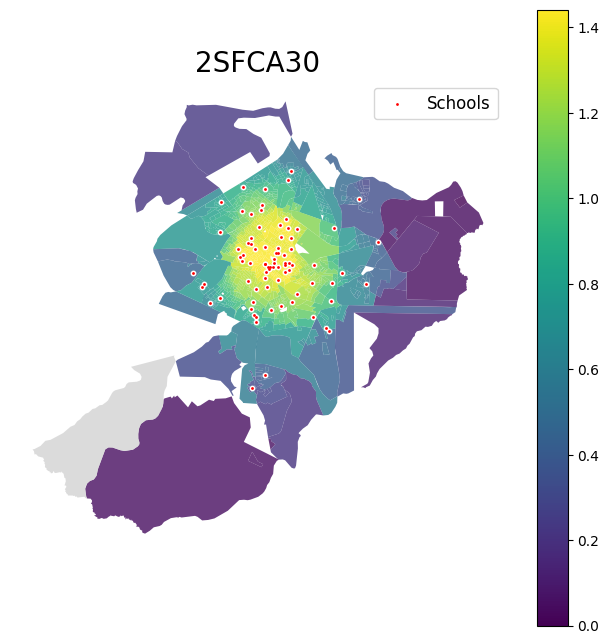

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


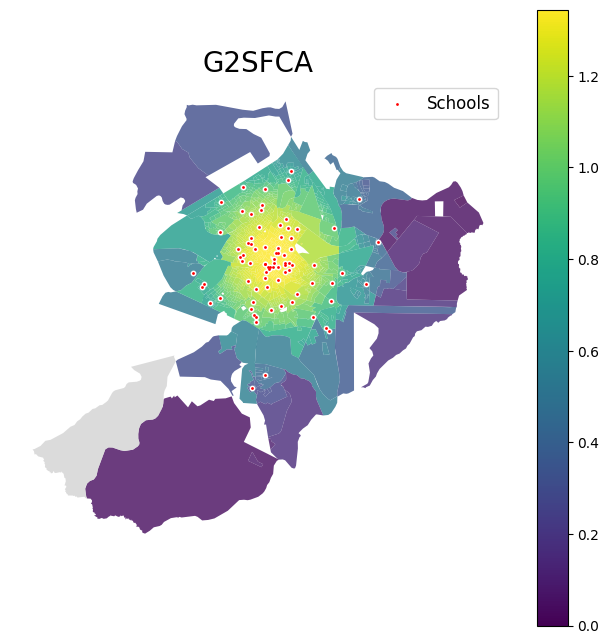

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


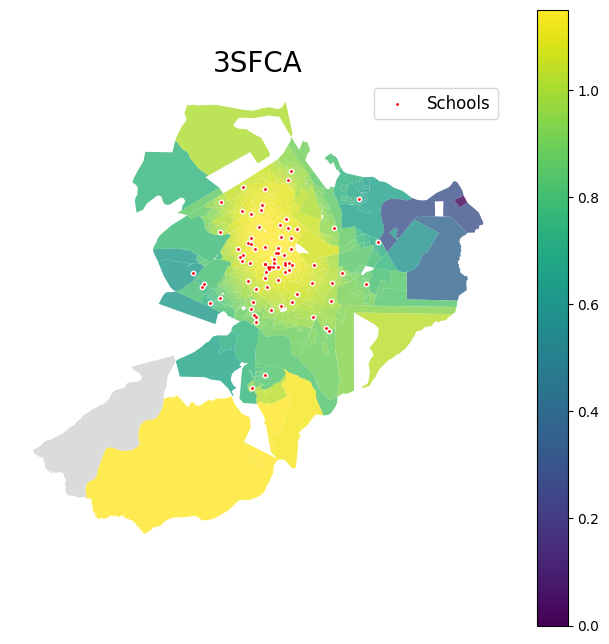

In [25]:
def make_access_map(city_name):
    subset_dem = geo_dem_census_df[geo_dem_census_df["city_name"] == city_name]
    subset_school = geo_school_census_df[geo_school_census_df["city_name"] == city_name]
    # Creating access object
    A = Access(
    demand_df=subset_dem,
    demand_index="sector_id",
    demand_value="n_people_15to17",
    supply_df=subset_school,
    supply_index="school_id",
    supply_value="n_teachers"
    )

    # Creating euclidean distance
    A.create_euclidean_distance(threshold=10000, centroid_o=True, centroid_d=True)

    # Defining custom weight functions
    fn30 = weights.step_fn({0: 1, 5000: 0.68, 10000: 0.22, 15000: 0.05})
    gaussian = weights.gaussian(6000)   

    # Access metrics to calculate
    max_cost = 16000
    A.enhanced_two_stage_fca(name="2sfca30", weight_fn=fn30, max_cost=16000)
    A.enhanced_two_stage_fca(name="g2sfca", weight_fn=gaussian, max_cost=16000)
    A.three_stage_fca(name = "3sfca", weight_fn=gaussian, max_cost = 16000)


    il_map = subset_dem[["sector_id", "n_people_15to17", "geometry"]].set_index("sector_id").join(A.norm_access_df, how="inner")

    #plot("2sfca_n_teachers", il_map, subset_school)
    plot("2sfca30_n_teachers", il_map, subset_school)
    plot("g2sfca_n_teachers", il_map, subset_school)
    plot("3sfca_n_teachers", il_map, subset_school)


def plot(v, il_map, subset_school, ax=None, leg=True):

    swap_colors = "raam" in v

    base = il_map.plot(
        v,
        legend=leg,
        figsize=(8, 8),
        cmap="viridis_r" if swap_colors else "viridis",
        markersize=5,
        alpha=0.8,
        #vmin=il_map[v].quantile(0.05),
        vmax=il_map[v].quantile(0.95),
        missing_kwds={'color': 'lightgrey'}
    )

    subset_school.plot(ax=base, markersize=10, color="white")
    subset_school.plot(
        ax=base, markersize=4, color="red", edgecolor="white", linewidth=0 , label = "Schools"
    )

    base.set_axis_off()
    base.set_title(v.split("_")[0].upper(), fontsize=20)
    base.legend(loc="best", fontsize=12)


    plt.show()

make_access_map("Ribeirão Preto")

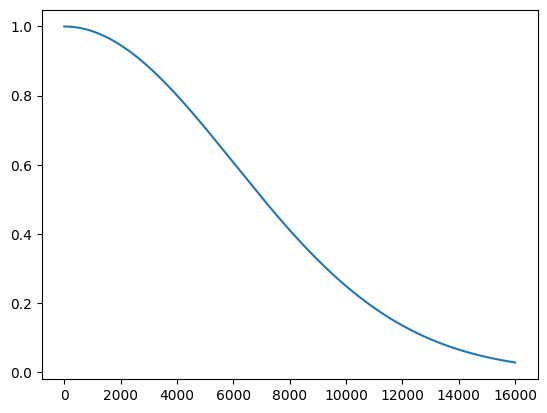

In [23]:
# Plot a gaussian function
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 16000, 10000)
y = weights.gaussian(6000)(x)
plt.plot(x, y)